Index(['7', '8', '9', '10', '11', '12'], dtype='object')
761.9729430675507


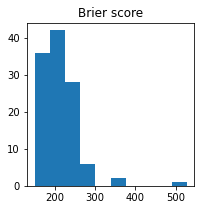

In [1]:
import pandas as pd
import datetime
import time
import math
import numpy as np
import os
import glob
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
start = time.time()
scoville_metadata = pd.read_excel("C:\\Users\\Mahashweta Patra\\Documents\\MikeLudkovski\\Scovilleriskpartners\\CSV\\metaData.xlsx")
#print(scoville_metadata['AssetName'][36:151])
a=[]
start_date = '20170101'
end_date = '20181231'
date_temp_lst = []  # temp list to collect dfs. this is faster than appending the dfs to a bigger df
date_range = pd.date_range(start_date, end_date, freq= 'D')
date_range_str = date_range.strftime('%Y%m%d').tolist()
day=['IntraDay2']
hourly =  pd.read_csv("C:\\Users\\Mahashweta Patra\\Documents\\MikeLudkovski\\Scovilleriskpartners\\CSV\\IntraDay2\\SimDat_20180202\\wind\\Baffin.csv")
hours=hourly.columns[2:8]
print(hours)
for asset in range(36,151):
    score=0.0
    filename=scoville_metadata['AssetName'][asset]
    #print('filename',filename)
    for date in date_range_str:
        hourly_percentiles = pd.read_csv("C:\\Users\\Mahashweta Patra\\Documents\\MikeLudkovski\\Scovilleriskpartners\\CSV\\IntraDay2\\SimDat_"+str(date)+"\\wind\\"+filename+".csv")
        #hours=hourly_percentiles.index
        for i in hours: #range(1,6):
            column1=hourly_percentiles[str(i)]
            #print('column1',column1)
            max_value = np.max(column1)
            #print('max_value',max_value)
            repeatation=len(np.where(column1[2:1001]==0)[0])
            #print(repeatation)
            probability=repeatation/1000
            #print(probability)
            if probability>0.01:
                actual=column1[0]
                #print(actual)
                if actual==0:
                    BS=(probability-1)*(probability-1)
                else:
                    BS=(probability-0)*(probability-0)
                #print(BS)
                score=score+BS
    a.append(score)            
    #print(score)
import numpy
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.hist(a, bins=10)
plt.xticks(rotation=0)
plt.title('Brier score')
numpy.histogram(a)
end = time.time()
print(end-start)
